#Reto Prototype

##Entendimiento del problema y del DF

In [41]:
!pip install haversine
import haversine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import haversine as hs
import folium
sns.set(style='white')


datos = pd.read_csv("https://raw.githubusercontent.com/brewing-datacup/reto-mexico-2020/main/data/ubicaciones.csv")
datos.head()
df = pd.DataFrame(datos)
df

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon
0,1,A1,1,2.0,20.506052,-98.212377
1,2,A1,1,17.0,20.458128,-98.221248
2,3,A1,1,2.0,20.530427,-98.236860
3,4,A1,3,15.0,20.488655,-98.202940
4,5,A1,1,2.0,20.533253,-98.219669
...,...,...,...,...,...,...
3620,3621,A1,1,15.0,20.558651,-98.149706
3621,3622,A1,1,2.0,20.541300,-98.157300
3622,3623,A1,1,6.0,20.509200,-98.128000
3623,3624,A1,1,31.0,20.513400,-98.154500


In [42]:
!pip install mlrose
import mlrose

In [50]:
import plotly.graph_objects as go

In [51]:
import datetime

In [52]:
import plotly.express as px

##Analisis exploratorio

In [53]:
df.describe()

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon
count,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000
mean,1813.000000,1.097103,13.195724,20.508669,-98.189818
std,1046.591691,0.319449,20.158246,0.034647,0.044283
min,1.000000,1.000000,0.000000,20.435038,-98.298948
25%,907.000000,1.000000,2.000000,20.480661,-98.221491
50%,1813.000000,1.000000,6.000000,20.507537,-98.183900
75%,2719.000000,1.000000,15.000000,20.537206,-98.153300
max,3625.000000,3.000000,175.000000,20.608307,-98.108122


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id_Cliente   3625 non-null   int64  
 1   id_Agencia   3625 non-null   object 
 2   Frecuencia   3625 non-null   int64  
 3   Vol_Entrega  3625 non-null   float64
 4   lat          3625 non-null   float64
 5   lon          3625 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 170.0+ KB


In [55]:
df['Vol_total'] = df['Frecuencia']*df['Vol_Entrega']
df.head()

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total
0,1,A1,1,2.0,20.506052,-98.212377,2.0
1,2,A1,1,17.0,20.458128,-98.221248,17.0
2,3,A1,1,2.0,20.530427,-98.236860,2.0
3,4,A1,3,15.0,20.488655,-98.202940,45.0
4,5,A1,1,2.0,20.533253,-98.219669,2.0


In [56]:
df_prueba = df

In [57]:
#Eliminamos a clientes que tienen volumen de entrega = 0
df_prueba = df_prueba[df_prueba['Vol_Entrega']>0]
df_prueba.describe()

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon,Vol_total
count,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000
mean,1809.066723,1.099519,13.524032,20.508293,-98.189821,15.380266
std,1048.306515,0.323027,20.298436,0.034621,0.044243,23.132998
min,1.000000,1.000000,0.500000,20.435038,-98.298948,1.000000
25%,900.000000,1.000000,2.000000,20.480415,-98.221491,2.000000
50%,1809.000000,1.000000,6.000000,20.506990,-98.183900,6.000000
75%,2713.000000,1.000000,16.000000,20.536700,-98.153372,18.000000
max,3625.000000,3.000000,175.000000,20.608307,-98.108122,175.000000


###Graficos

In [58]:
df_prueba.groupby(['Frecuencia'])[['Id_Cliente']].count()

,Id_Cliente
Frecuencia,
1,3211
2,300
3,26


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



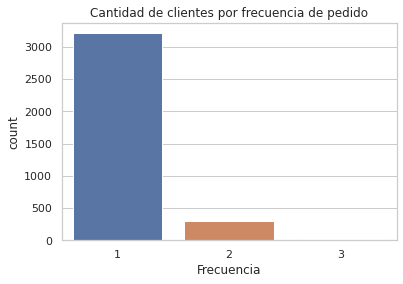

In [59]:
sns.set_style('whitegrid')
graf_1 = sns.countplot(df_prueba['Frecuencia'])
graf_1.set(title = 'Cantidad de clientes por frecuencia de pedido');

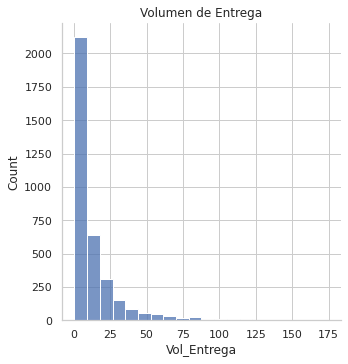

In [60]:
sns.set_style('whitegrid')
graf_2 = sns.displot(df_prueba['Vol_Entrega'], kde=False, bins=20)
graf_2.set(title='Volumen de Entrega');

In [61]:
df_2 = df_prueba[df_prueba['Frecuencia'] == 3]
df_2
df_3 = df_prueba[df_prueba['Frecuencia'] == 1]
df_3
df_4 = df_prueba[df_prueba['Frecuencia'] == 2]
df_4

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total
12,13,A1,2,13.0,20.537454,-98.140527,26.0
16,17,A1,2,13.5,20.519419,-98.228799,27.0
17,18,A1,2,7.0,20.539439,-98.231014,14.0
21,22,A1,2,12.0,20.534294,-98.163798,24.0
22,23,A1,2,10.0,20.465644,-98.222902,20.0
...,...,...,...,...,...,...,...
3542,3543,A1,2,13.5,20.522600,-98.217700,27.0
3547,3548,A1,2,0.5,20.547308,-98.143832,1.0
3574,3575,A1,2,4.0,20.534023,-98.131136,8.0
3587,3588,A1,2,17.0,20.478326,-98.242853,34.0


dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

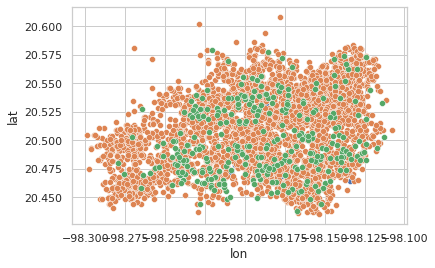

In [62]:
from matplotlib import markers
all_shapes = markers.MarkerStyle.markers.keys()
graf_3 = sns.scatterplot(x=df_2['lon'],y=df_2['lat']) #Hacer la grafica para las otras dos frecuencias y mejorar estilo de grafico.
graf_4 = sns.scatterplot(x=df_3['lon'],y=df_3['lat'])
graf_5 = sns.scatterplot(x=df_4['lon'],y=df_4['lat'])
all_shapes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

Text(0.5, 1.0, 'Todas las frecuencias')

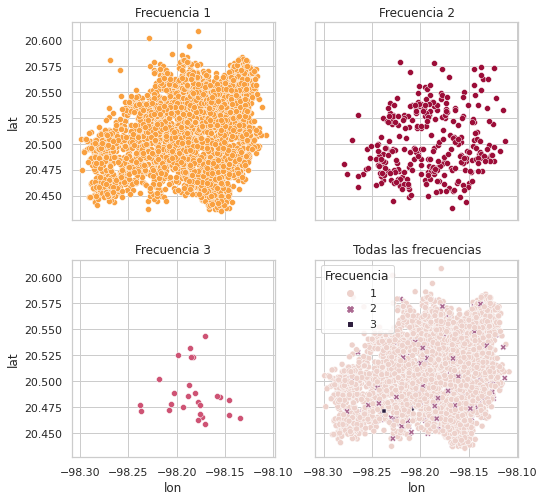

In [63]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(df_3['lon'], df_3['lat'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(df_4['lon'], df_4['lat'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(df_2['lon'], df_2['lat'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(df_prueba['lon'], df_prueba['lat'], hue=df_prueba['Frecuencia'], style=df_prueba['Frecuencia'], ax=axes[1,1])


axes[0, 0].set_title('Frecuencia 1')
axes[0, 1].set_title('Frecuencia 2')
axes[1, 0].set_title('Frecuencia 3')
axes[1, 1].set_title('Todas las frecuencias')

###Correlacion

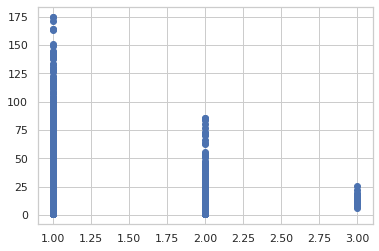

In [64]:
#Vamos a revisar si existe alguna correlacion entre volumen de entrega y frencuencia
plt.scatter(df_prueba['Frecuencia'], df_prueba['Vol_Entrega']);

In [65]:
df_prueba['Frecuencia'].corr(df_prueba['Vol_Entrega'])

0.0778526301968832

##Definición de metodo a utilizar

In [66]:
#Vamos a preparar el Kmeans para hacer la division de los territorios optimos
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [67]:
df_kmeans = df_prueba.loc[:,['Id_Cliente','lon','lat']]
df_kmeans

,Id_Cliente,lon,lat
0,1,-98.212377,20.506052
1,2,-98.221248,20.458128
2,3,-98.236860,20.530427
3,4,-98.202940,20.488655
4,5,-98.219669,20.533253
...,...,...,...
3620,3621,-98.149706,20.558651
3621,3622,-98.157300,20.541300
3622,3623,-98.128000,20.509200
3623,3624,-98.154500,20.513400


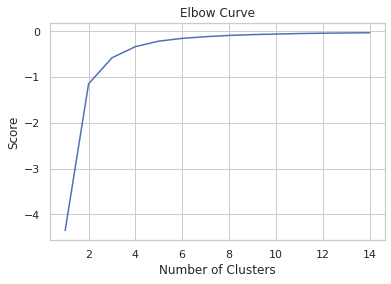

In [68]:
#Con la grafica del codo revisamos el numero optimmo de cluster, pero nosotros ya sabemos que queremos dividirlo en 6 zonas optimas
cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in cluster]
kmeans
y= df[['lat']]
x= df[['lon']]
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]
plt.plot(cluster, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [69]:
k_means = KMeans(n_clusters=6, max_iter=10000)
k_means.fit(df_kmeans[['lon', 'lat']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
centers = k_means.cluster_centers_

centers

array([[-98.19839806,  20.48454161],
       [-98.18659906,  20.54251807],
       [-98.22951734,  20.52133205],
       [-98.26331321,  20.47785549],
       [-98.15459181,  20.47513534],
       [-98.14113838,  20.54324655]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



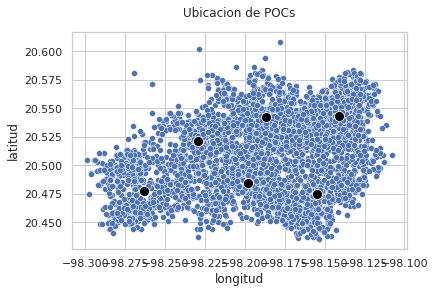

In [71]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicacion de POCs', pad=15)
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')

sns.scatterplot(df_kmeans['lon'], df_kmeans['lat'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

In [72]:
clasificaciones = k_means.predict(df_kmeans[['lon', 'lat']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



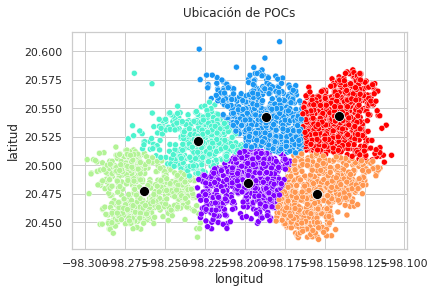

In [73]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de POCs', pad=15)
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')

sns.scatterplot(df_kmeans['lon'], df_kmeans['lat'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [74]:
clasificaciones

array([2, 0, 2, ..., 5, 5, 1], dtype=int32)

In [75]:
df_kmeans['Cluster']= clasificaciones
df_kmeans

,Id_Cliente,lon,lat,Cluster
0,1,-98.212377,20.506052,2
1,2,-98.221248,20.458128,0
2,3,-98.236860,20.530427,2
3,4,-98.202940,20.488655,0
4,5,-98.219669,20.533253,2
...,...,...,...,...
3620,3621,-98.149706,20.558651,5
3621,3622,-98.157300,20.541300,5
3622,3623,-98.128000,20.509200,5
3623,3624,-98.154500,20.513400,5


In [76]:
df_prueba['Cluster']= clasificaciones
df_prueba

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1,A1,1,2.0,20.506052,-98.212377,2.0,2
1,2,A1,1,17.0,20.458128,-98.221248,17.0,0
2,3,A1,1,2.0,20.530427,-98.236860,2.0,2
3,4,A1,3,15.0,20.488655,-98.202940,45.0,0
4,5,A1,1,2.0,20.533253,-98.219669,2.0,2
...,...,...,...,...,...,...,...,...
3620,3621,A1,1,15.0,20.558651,-98.149706,15.0,5
3621,3622,A1,1,2.0,20.541300,-98.157300,2.0,5
3622,3623,A1,1,6.0,20.509200,-98.128000,6.0,5
3623,3624,A1,1,31.0,20.513400,-98.154500,31.0,5


In [77]:
df_prueba.groupby(['Cluster'])[['Id_Cliente']].count()

,Id_Cliente
Cluster,
0,592
1,571
2,433
3,534
4,648
5,759


In [78]:
#Vamos hacer la separacion por cluster
df_cluster_0 = df_prueba[df_prueba['Cluster'] == 0]

df_cluster_1 = df_prueba[df_prueba['Cluster'] == 1]

df_cluster_2 = df_prueba[df_prueba['Cluster'] == 2]

df_cluster_3 = df_prueba[df_prueba['Cluster'] == 3]

df_cluster_4 = df_prueba[df_prueba['Cluster'] == 4]

df_cluster_5 = df_prueba[df_prueba['Cluster'] == 5]

##Implementar solución

### Cluster 0

In [28]:
df_cluster_0

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
12,13,A1,2,13.0,20.537454,-98.140527,26.0,0
14,15,A1,1,21.0,20.562590,-98.138353,21.0,0
18,19,A1,1,11.0,20.547675,-98.130903,11.0,0
25,26,A1,1,14.0,20.554421,-98.157790,14.0,0
43,44,A1,2,12.0,20.526645,-98.156020,24.0,0
...,...,...,...,...,...,...,...,...
3613,3614,A1,1,2.0,20.532000,-98.127800,2.0,0
3620,3621,A1,1,15.0,20.558651,-98.149706,15.0,0
3621,3622,A1,1,2.0,20.541300,-98.157300,2.0,0
3622,3623,A1,1,6.0,20.509200,-98.128000,6.0,0


In [29]:
df_cluster_0_sample = df_cluster_0.sample(100)
df_cluster_0_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
1206,1207,A1,1,1.0,20.559988,-98.138488,1.0,0
2072,2073,A1,1,4.0,20.514800,-98.126200,4.0,0
1856,1857,A1,1,25.0,20.534999,-98.145404,25.0,0
3050,3051,A1,1,3.0,20.553933,-98.141336,3.0,0
1954,1955,A1,1,2.0,20.511200,-98.115400,2.0,0
...,...,...,...,...,...,...,...,...
3101,3102,A1,1,1.0,20.517406,-98.138955,1.0,0
3368,3369,A1,1,2.0,20.549070,-98.157062,2.0,0
2735,2736,A1,1,2.0,20.547602,-98.153432,2.0,0
864,865,A1,1,12.0,20.528816,-98.157085,12.0,0


In [30]:
#Necesitamos reiniciar los indices para que nuestro for y mlrose vayan a funcionar
df_cluster_0_sample = df_cluster_0_sample.reset_index(drop=True)
df_cluster_0_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1207,A1,1,1.0,20.559988,-98.138488,1.0,0
1,2073,A1,1,4.0,20.514800,-98.126200,4.0,0
2,1857,A1,1,25.0,20.534999,-98.145404,25.0,0
3,3051,A1,1,3.0,20.553933,-98.141336,3.0,0
4,1955,A1,1,2.0,20.511200,-98.115400,2.0,0
...,...,...,...,...,...,...,...,...
95,3102,A1,1,1.0,20.517406,-98.138955,1.0,0
96,3369,A1,1,2.0,20.549070,-98.157062,2.0,0
97,2736,A1,1,2.0,20.547602,-98.153432,2.0,0
98,865,A1,1,12.0,20.528816,-98.157085,12.0,0


In [160]:
df_cluster_0_sample.to_csv('df_cluster_0_sample.csv', header=True, index=False)


In [162]:
dfc_0 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_0_sample.csv')
dfc_0

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1207,A1,1,1.0,20.559988,-98.138488,1.0,0
1,2073,A1,1,4.0,20.514800,-98.126200,4.0,0
2,1857,A1,1,25.0,20.534999,-98.145404,25.0,0
3,3051,A1,1,3.0,20.553933,-98.141336,3.0,0
4,1955,A1,1,2.0,20.511200,-98.115400,2.0,0
...,...,...,...,...,...,...,...,...
95,3102,A1,1,1.0,20.517406,-98.138955,1.0,0
96,3369,A1,1,2.0,20.549070,-98.157062,2.0,0
97,2736,A1,1,2.0,20.547602,-98.153432,2.0,0
98,865,A1,1,12.0,20.528816,-98.157085,12.0,0


In [32]:
#Vamos a llamar a la API OSMR de distancias para calcular X distancia
import requests
import json
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{-98.234846},{20.490668};{-98.226042},{20.539655}?overview=false""")

In [33]:
#Combinaciones posibles 
import itertools
combination = itertools.combinations(list(df_cluster_0_sample["Id_Cliente"]),2)
len([c for c in combination])

4950

In [34]:
def get_distance(point1: dict, point2: dict) -> tuple:
    """Gets distance between two points en route using http://project-osrm.org/docs/v5.10.0/api/#nearest-service"""
    
    url = f"""http://router.project-osrm.org/route/v1/driving/{point1["lon"]},{point1["lat"]};{point2["lon"]},{point2["lat"]}?overview=false&alternatives=false"""
    r = requests.get(url)
    
    # get the distance from the returned values
    route = json.loads(r.content)["routes"][0]
    return (route["distance"], route["duration"])

In [35]:
get_distance({"lat": 48.200000,"lon": 16.366667}, {"lat": 50.083333,"lon": 14.466667})

(334266.3, 13524.2)

In [36]:
combination = itertools.combinations(list(df_cluster_0_sample["Id_Cliente"]),2)
len([c for c in itertools.combinations(list(df_cluster_0_sample["Id_Cliente"]),2)])

4950

In [ ]:
list(df_cluster_0_sample["Id_Cliente"])

In [38]:
dist_array_0 = []
for i , r in df_cluster_0_sample.iterrows():
    point1 = {"lat": r["lat"], "lon": r["lon"]}
    for j, o in df_cluster_0_sample[df_cluster_0_sample.index != i].iterrows():
        point2 = {"lat": o["lat"], "lon": o["lon"]}
        dist, duration = get_distance(point1, point2)
        #dist = geodesic((i_lat, i_lon), (o["CapitalLatitude"], o["CapitalLongitude"])).km
        if dist != 0:
          dist_array_0.append((i, j, duration, dist))

In [ ]:
dist_array_0

In [40]:
np.savetxt('Arreglo_Cluster_0.txt',dist_array_0, fmt= '%1.3f')

In [163]:
Arreglo_0 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_0.txt')

In [167]:
distances_df_0 = pd.DataFrame(Arreglo_0,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_0

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,1234.0,8569.3
1,0.0,2.0,1106.0,7681.1
2,0.0,3.0,379.5,2636.8
3,0.0,4.0,3130.6,21743.0
4,0.0,5.0,880.3,6113.7
...,...,...,...,...
9771,99.0,94.0,527.7,3666.1
9772,99.0,95.0,1281.3,8899.2
9773,99.0,96.0,13697.6,115681.6
9774,99.0,97.0,826.3,5739.8


In [168]:
distances_df_0 = distances_df_0.merge(dfc_0[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_0 = distances_df_0.merge(dfc_0[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_0

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,1234.0,8569.3,1207,2073
195,2.0,1.0,128.0,888.2,1857,2073
292,3.0,1.0,854.5,5932.5,3051,2073
389,4.0,1.0,1896.6,13173.6,1955,2073
487,5.0,1.0,353.7,2455.6,2777,2073
...,...,...,...,...,...,...
9374,95.0,88.0,1415.4,9829.5,3102,3122
9472,96.0,88.0,13827.4,116611.9,3369,3122
9567,97.0,88.0,960.4,6670.1,2736,3122
9666,98.0,88.0,3326.9,23007.6,865,3122


In [169]:
dist_list_0 = list(distances_df_0[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_0[:5] + ["..."] + dist_list_0[-5:]

[(0., 1., 1234.),
 (0., 2., 1106.),
 (0., 3., 379.5),
 (0., 4., 3130.6),
 (0., 5., 880.3),
 '...',
 (99., 94., 527.7),
 (99., 95., 1281.3),
 (99., 96., 13697.6),
 (99., 97., 826.3),
 (99., 98., 3191.9)]

In [209]:
length_0 = dfc_0.shape[0]
length_0

100

In [212]:
fitness_dists_0 = mlrose.TravellingSales(distances = Arreglo_0)

In [213]:
problem_fit_0 = mlrose.TSPOpt(length = length_0, fitness_fn = fitness_dists_0,
                            maximize=False)

In [214]:
best_state_0, best_fitness_0 = mlrose.genetic_alg(problem_fit_0, random_state = 2)

In [215]:
print(f"The best state found is: {best_state_0}, taking {best_fitness_0} ({str(datetime.timedelta(seconds=best_fitness_0))})")

The best state found is: [68 29 92 45 21 99 56 87 75 98 43 82 47 76 35 10 55 73 94 81 77 59 30 90
 11 25 54 93 12  9 14 74 39 80 71 49 96 65  8 52 67 86 41 24 72 60 78 62
  7 16 13 26 28 57 83 48 64 63 37 42 91  4 84  5 19 40 38 15 58 32 20 66
 53 27  1 79  6 69 61 22 34 36 97  3 95 33 23 51 31 70 46 88 18 44  2 17
 50 85 89  0], taking 169076.9000000001 (1 day, 22:57:56.900000)


In [ ]:
orders_0 = {city: order for order, city in enumerate(best_state_0)}
orders_0

In [218]:
dfc_0["order"] = dfc_0.index.map(orders_0)
dfc_0 = dfc_0.sort_values(by="order")
dfc_0.to_csv('dfc_0_ord.csv', header=True, index=False)

In [220]:
dfc_0_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_0_ord.csv')
dfc_0_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,3261,A1,1,27.0,20.568511,-98.144383,27.0,0,0
1,3403,A1,1,12.0,20.554400,-98.137100,12.0,0,1
2,969,A1,1,46.0,20.513936,-98.129440,46.0,0,2
3,252,A1,1,2.0,20.534159,-98.145739,2.0,0,3
4,2759,A1,1,12.0,20.535180,-98.145594,12.0,0,4
...,...,...,...,...,...,...,...,...,...
95,3348,A1,1,7.0,20.527600,-98.148900,7.0,0,95
96,2706,A1,1,9.0,20.554865,-98.135535,9.0,0,96
97,2650,A1,2,2.0,20.562682,-98.129598,4.0,0,97
98,1785,A1,1,2.0,20.555400,-98.137500,2.0,0,98


In [221]:
fig = px.scatter_mapbox(dfc_0_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Cluster 1

In [ ]:
df_cluster_1

In [77]:
df_cluster_1_sample = df_cluster_1.sample(100)
df_cluster_1_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
2066,2067,A1,1,4.0,20.462664,-98.259986,4.0,1
2633,2634,A1,1,1.0,20.486358,-98.289283,1.0,1
2051,2052,A1,1,21.0,20.464404,-98.254614,21.0,1
823,824,A1,1,6.0,20.490493,-98.250562,6.0,1
1783,1784,A1,1,15.0,20.503645,-98.271165,15.0,1
...,...,...,...,...,...,...,...,...
2168,2169,A1,1,1.0,20.456898,-98.269155,1.0,1
2004,2005,A1,1,2.0,20.464437,-98.258263,2.0,1
2513,2514,A1,1,1.0,20.481001,-98.266164,1.0,1
952,953,A1,2,71.5,20.444444,-98.228452,143.0,1


In [78]:
#Necesitamos reiniciar los indices para que nuestro for y mlrose vayan a funcionar
df_cluster_1_sample = df_cluster_1_sample.reset_index(drop=True)
df_cluster_1_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,2067,A1,1,4.0,20.462664,-98.259986,4.0,1
1,2634,A1,1,1.0,20.486358,-98.289283,1.0,1
2,2052,A1,1,21.0,20.464404,-98.254614,21.0,1
3,824,A1,1,6.0,20.490493,-98.250562,6.0,1
4,1784,A1,1,15.0,20.503645,-98.271165,15.0,1
...,...,...,...,...,...,...,...,...
95,2169,A1,1,1.0,20.456898,-98.269155,1.0,1
96,2005,A1,1,2.0,20.464437,-98.258263,2.0,1
97,2514,A1,1,1.0,20.481001,-98.266164,1.0,1
98,953,A1,2,71.5,20.444444,-98.228452,143.0,1


In [226]:
df_cluster_1_sample.to_csv('df_cluster_1_sample.csv', header=True, index=False)


In [13]:
dfc_1 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_1_sample.csv')
dfc_1

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,2067,A1,1,4.0,20.462664,-98.259986,4.0,1
1,2634,A1,1,1.0,20.486358,-98.289283,1.0,1
2,2052,A1,1,21.0,20.464404,-98.254614,21.0,1
3,824,A1,1,6.0,20.490493,-98.250562,6.0,1
4,1784,A1,1,15.0,20.503645,-98.271165,15.0,1
...,...,...,...,...,...,...,...,...
95,2169,A1,1,1.0,20.456898,-98.269155,1.0,1
96,2005,A1,1,2.0,20.464437,-98.258263,2.0,1
97,2514,A1,1,1.0,20.481001,-98.266164,1.0,1
98,953,A1,2,71.5,20.444444,-98.228452,143.0,1


In [79]:
#Vamos a llamar a la API OSMR de distancias para calcular X distancia
import requests
import json
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{-98.234846},{20.490668};{-98.226042},{20.539655}?overview=false""")

In [81]:
#Combinaciones posibles 
import itertools
combination = itertools.combinations(list(df_cluster_1_sample["Id_Cliente"]),2)
len([c for c in combination])

4950

In [82]:
def get_distance(point1: dict, point2: dict) -> tuple:
    """Gets distance between two points en route using http://project-osrm.org/docs/v5.10.0/api/#nearest-service"""
    
    url = f"""http://router.project-osrm.org/route/v1/driving/{point1["lon"]},{point1["lat"]};{point2["lon"]},{point2["lat"]}?overview=false&alternatives=false"""
    r = requests.get(url)
    
    # get the distance from the returned values
    route = json.loads(r.content)["routes"][0]
    return (route["distance"], route["duration"])

In [83]:
get_distance({"lat": 48.200000,"lon": 16.366667}, {"lat": 50.083333,"lon": 14.466667})

(334266.3, 13524.2)

In [84]:
combination = itertools.combinations(list(df_cluster_1_sample["Id_Cliente"]),2)
len([c for c in itertools.combinations(list(df_cluster_1_sample["Id_Cliente"]),2)])

4950

In [ ]:
list(df_cluster_1_sample["Id_Cliente"])

In [86]:
dist_array_1 = []
for i , r in df_cluster_1_sample.iterrows():
    point1 = {"lat": r["lat"], "lon": r["lon"]}
    for j, o in df_cluster_1_sample[df_cluster_1_sample.index != i].iterrows():
        point2 = {"lat": o["lat"], "lon": o["lon"]}
        dist, duration = get_distance(point1, point2)
        #dist = geodesic((i_lat, i_lon), (o["CapitalLatitude"], o["CapitalLongitude"])).km
        if dist != 0:
          dist_array_1.append((i, j, duration, dist))

In [ ]:
dist_array_1

In [88]:
np.savetxt('Arreglo_Cluster_1.txt',dist_array_1, fmt= '%1.3f')

In [14]:
Arreglo_1 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_1.txt')

In [15]:
distances_df_1 = pd.DataFrame(Arreglo_1,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_1

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,8473.4,75113.5
1,0.0,2.0,788.0,5409.5
2,0.0,3.0,1167.1,7993.4
3,0.0,4.0,8263.9,74760.8
4,0.0,5.0,1636.3,11295.5
...,...,...,...,...
9817,99.0,94.0,530.0,3677.9
9818,99.0,95.0,1112.6,7682.0
9819,99.0,96.0,239.9,1663.7
9820,99.0,97.0,1480.3,10180.8


In [16]:
distances_df_1 = distances_df_1.merge(dfc_1[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_1 = distances_df_1.merge(dfc_1[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_1

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,8473.4,75113.5,2067,2634
199,2.0,1.0,8587.9,75901.2,2052,2634
298,3.0,1.0,8963.6,78485.2,824,2634
395,4.0,1.0,719.6,6065.4,1784,2634
494,5.0,1.0,9437.4,81787.3,2816,2634
...,...,...,...,...,...,...
9334,95.0,0.0,169.4,1175.6,2169,2067
9431,96.0,0.0,703.3,4842.7,2005,2067
9530,97.0,0.0,536.9,3674.4,2514,2067
9624,98.0,0.0,2005.0,13906.1,953,2067


In [17]:
dist_list_1 = list(distances_df_1[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_1[:5] + ["..."] + dist_list_1[-5:]

[(0., 1., 8473.4),
 (0., 2., 788.),
 (0., 3., 1167.1),
 (0., 4., 8263.9),
 (0., 5., 1636.3),
 '...',
 (99., 94., 530.),
 (99., 95., 1112.6),
 (99., 96., 239.9),
 (99., 97., 1480.3),
 (99., 98., 2278.6)]

In [18]:
length_1 = dfc_1.shape[0]
length_1

100

In [19]:
fitness_dists_1 = mlrose.TravellingSales(distances = Arreglo_1)

In [20]:
problem_fit_1 = mlrose.TSPOpt(length = length_1, fitness_fn = fitness_dists_1,
                            maximize=False)

In [21]:
best_state_1, best_fitness_1 = mlrose.genetic_alg(problem_fit_1, random_state = 2)

In [22]:
print(f"The best state found is: {best_state_1}, taking {best_fitness_1} ({str(datetime.timedelta(seconds=best_fitness_1))})")

The best state found is: [74 11 95 49 85 18 13 99 65 35 36 54 55 71 16 32 38 61 44 33 43 81 78 15
 29 90 94 76 89  4  0  3 67 14 12 98 75 92 80 96 17  8 52 57 24 48 51 62
 21 91 19 53 56 64 72 70 69 63 37 41 86 97 88 73  6 93 22 28 42 47 66 31
 27 40 68 82  2 34  1 30 83 87 23 77 79 59 26 84 10  7 60 50 20 58 46  5
 45 39  9 25], taking 280317.29999999993 (3 days, 5:51:57.300000)


In [ ]:
orders_1 = {city: order for order, city in enumerate(best_state_1)}
orders_1

In [24]:
dfc_1["order"] = dfc_1.index.map(orders_1)
dfc_1 = dfc_1.sort_values(by="order")
dfc_1.to_csv('dfc_1_ord.csv', header=True, index=False)

In [48]:
dfc_1_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_1_ord.csv')
dfc_1_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,1972,A1,1,27.0,20.460132,-98.273475,27.0,1,0
1,2047,A1,1,2.0,20.457471,-98.279937,2.0,1,1
2,2169,A1,1,1.0,20.456898,-98.269155,1.0,1,2
3,1954,A1,1,1.0,20.461726,-98.268179,1.0,1,3
4,377,A1,1,12.0,20.453799,-98.264035,12.0,1,4
...,...,...,...,...,...,...,...,...,...
95,2816,A1,1,24.0,20.484966,-98.237589,24.0,1,95
96,227,A1,1,27.0,20.470139,-98.241015,27.0,1,96
97,2685,A1,1,2.0,20.483669,-98.274246,2.0,1,97
98,1989,A1,1,6.0,20.454564,-98.260457,6.0,1,98


In [49]:
fig = px.scatter_mapbox(dfc_1_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Cluster 2

In [79]:
df_cluster_2

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1,A1,1,2.0,20.506052,-98.212377,2.0,2
2,3,A1,1,2.0,20.530427,-98.236860,2.0,2
4,5,A1,1,2.0,20.533253,-98.219669,2.0,2
9,10,A1,1,10.0,20.580700,-98.269400,10.0,2
13,14,A1,1,17.0,20.523875,-98.238248,17.0,2
...,...,...,...,...,...,...,...,...
3581,3582,A1,1,2.0,20.490668,-98.234846,2.0,2
3582,3583,A1,1,2.0,20.534255,-98.218709,2.0,2
3596,3597,A1,1,1.0,20.519507,-98.220339,1.0,2
3597,3598,A1,1,2.0,20.536774,-98.212955,2.0,2


In [80]:
df_cluster_2_sample = df_cluster_2.sample(100)
df_cluster_2_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
2750,2751,A1,1,13.0,20.502981,-98.222975,13.0,2
3582,3583,A1,1,2.0,20.534255,-98.218709,2.0,2
111,112,A1,1,4.0,20.520750,-98.259616,4.0,2
739,740,A1,1,11.0,20.544126,-98.221813,11.0,2
2406,2407,A1,1,1.0,20.514700,-98.210400,1.0,2
...,...,...,...,...,...,...,...,...
180,181,A1,2,11.0,20.515205,-98.215453,22.0,2
2491,2492,A1,1,2.0,20.534639,-98.270498,2.0,2
391,392,A1,1,38.0,20.529490,-98.235638,38.0,2
366,367,A1,1,2.0,20.538960,-98.225699,2.0,2


In [81]:
#Necesitamos reiniciar los indices para que nuestro for y mlrose vayan a funcionar
df_cluster_2_sample = df_cluster_2_sample.reset_index(drop=True)
df_cluster_2_sample

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,2751,A1,1,13.0,20.502981,-98.222975,13.0,2
1,3583,A1,1,2.0,20.534255,-98.218709,2.0,2
2,112,A1,1,4.0,20.520750,-98.259616,4.0,2
3,740,A1,1,11.0,20.544126,-98.221813,11.0,2
4,2407,A1,1,1.0,20.514700,-98.210400,1.0,2
...,...,...,...,...,...,...,...,...
95,181,A1,2,11.0,20.515205,-98.215453,22.0,2
96,2492,A1,1,2.0,20.534639,-98.270498,2.0,2
97,392,A1,1,38.0,20.529490,-98.235638,38.0,2
98,367,A1,1,2.0,20.538960,-98.225699,2.0,2


In [82]:
df_cluster_2_sample.to_csv('df_cluster_2_sample.csv', header=True, index=False)


In [83]:
dfc_2 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_2_sample.csv')
dfc_2

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,2751,A1,1,13.0,20.502981,-98.222975,13.0,2
1,3583,A1,1,2.0,20.534255,-98.218709,2.0,2
2,112,A1,1,4.0,20.520750,-98.259616,4.0,2
3,740,A1,1,11.0,20.544126,-98.221813,11.0,2
4,2407,A1,1,1.0,20.514700,-98.210400,1.0,2
...,...,...,...,...,...,...,...,...
95,181,A1,2,11.0,20.515205,-98.215453,22.0,2
96,2492,A1,1,2.0,20.534639,-98.270498,2.0,2
97,392,A1,1,38.0,20.529490,-98.235638,38.0,2
98,367,A1,1,2.0,20.538960,-98.225699,2.0,2


In [84]:
#Vamos a llamar a la API OSMR de distancias para calcular X distancia
import requests
import json
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{-98.234846},{20.490668};{-98.226042},{20.539655}?overview=false""")

In [85]:
#Combinaciones posibles 
import itertools
combination = itertools.combinations(list(df_cluster_2_sample["Id_Cliente"]),2)
len([c for c in combination])

4950

In [86]:
def get_distance(point1: dict, point2: dict) -> tuple:
    """Gets distance between two points en route using http://project-osrm.org/docs/v5.10.0/api/#nearest-service"""
    
    url = f"""http://router.project-osrm.org/route/v1/driving/{point1["lon"]},{point1["lat"]};{point2["lon"]},{point2["lat"]}?overview=false&alternatives=false"""
    r = requests.get(url)
    
    # get the distance from the returned values
    route = json.loads(r.content)["routes"][0]
    return (route["distance"], route["duration"])

In [87]:
get_distance({"lat": 48.200000,"lon": 16.366667}, {"lat": 50.083333,"lon": 14.466667})

(334266.3, 13524.2)

In [88]:
combination = itertools.combinations(list(df_cluster_2_sample["Id_Cliente"]),2)
len([c for c in itertools.combinations(list(df_cluster_2_sample["Id_Cliente"]),2)])

4950

In [89]:
list(df_cluster_2_sample["Id_Cliente"])

[2751,
 3583,
 112,
 740,
 2407,
 212,
 1524,
 457,
 1072,
 3075,
 1814,
 657,
 684,
 1424,
 1224,
 885,
 142,
 1234,
 1822,
 1213,
 1319,
 1603,
 3582,
 3159,
 3602,
 2944,
 303,
 2836,
 437,
 1214,
 279,
 3473,
 1243,
 2667,
 20,
 2387,
 2886,
 202,
 16,
 1523,
 1507,
 2904,
 3022,
 2336,
 3219,
 515,
 714,
 3598,
 1554,
 1730,
 2623,
 2627,
 834,
 1202,
 2744,
 897,
 1183,
 274,
 52,
 61,
 787,
 2176,
 774,
 2713,
 2625,
 2966,
 650,
 825,
 912,
 344,
 2811,
 2855,
 2653,
 2604,
 614,
 2804,
 1525,
 1393,
 2989,
 2896,
 638,
 458,
 2973,
 328,
 560,
 2899,
 1242,
 1093,
 852,
 359,
 1763,
 1097,
 2742,
 667,
 1244,
 181,
 2492,
 392,
 367,
 3121]

In [91]:
dist_array_2 = []
for i , r in df_cluster_2_sample.iterrows():
    point1 = {"lat": r["lat"], "lon": r["lon"]}
    for j, o in df_cluster_2_sample[df_cluster_2_sample.index != i].iterrows():
        point2 = {"lat": o["lat"], "lon": o["lon"]}
        dist, duration = get_distance(point1, point2)
        #dist = geodesic((i_lat, i_lon), (o["CapitalLatitude"], o["CapitalLongitude"])).km
        if dist != 0:
          dist_array_2.append((i, j, duration, dist))

In [92]:
dist_array_2

[(0, 1, 10355.6, 92173.7),
 (0, 2, 9857.3, 86640.4),
 (0, 3, 10432.5, 93026.5),
 (0, 4, 487.5, 3381.4),
 (0, 5, 10128.2, 89647.4),
 (0, 6, 9931.1, 87457.1),
 (0, 7, 10128.7, 89652.7),
 (0, 8, 10245.6, 90954.5),
 (0, 9, 616, 4275.7),
 (0, 10, 10075.4, 89060.1),
 (0, 11, 10227.9, 90755.3),
 (0, 12, 9995.5, 88173.4),
 (0, 13, 86.5, 600.3),
 (0, 14, 10462.5, 93358.1),
 (0, 15, 10128.7, 89652.7),
 (0, 16, 0.7, 5.1),
 (0, 17, 10257.2, 91083.3),
 (0, 18, 533.1, 3698.3),
 (0, 19, 10179.2, 90210.3),
 (0, 20, 258.8, 1800.9),
 (0, 21, 107.6, 748.5),
 (0, 22, 275.1, 1914.9),
 (0, 23, 10237.4, 90862.8),
 (0, 24, 10374.9, 92388.5),
 (0, 25, 10128.7, 89652.7),
 (0, 26, 10078.5, 89095.6),
 (0, 27, 10187, 90299),
 (0, 28, 140.8, 979.5),
 (0, 29, 10771.5, 96048.7),
 (0, 30, 10449.7, 93217.3),
 (0, 31, 616, 4275.7),
 (0, 32, 10357.8, 92198.3),
 (0, 33, 616, 4275.7),
 (0, 34, 11302.5, 106181.3),
 (0, 35, 9766.7, 85633.2),
 (0, 36, 10129.6, 89662.3),
 (0, 37, 10227.9, 90755.3),
 (0, 38, 10427.5, 92330.3),


In [93]:
np.savetxt('Arreglo_Cluster_2.txt',dist_array_2, fmt= '%1.3f')

In [94]:
Arreglo_2 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_2%20(1).txt')

In [95]:
distances_df_2 = pd.DataFrame(Arreglo_2,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_2

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,10355.6,92173.7
1,0.0,2.0,9857.3,86640.4
2,0.0,3.0,10432.5,93026.5
3,0.0,4.0,487.5,3381.4
4,0.0,5.0,10128.2,89647.4
...,...,...,...,...
9807,99.0,94.0,10830.9,94890.4
9808,99.0,95.0,10607.7,93340.0
9809,99.0,96.0,5193.0,55233.7
9810,99.0,97.0,28.9,324.0


In [96]:
distances_df_2 = distances_df_2.merge(dfc_2[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_2 = distances_df_2.merge(dfc_2[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_2

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,10355.6,92173.7,2751,3583
199,2.0,1.0,498.3,5533.3,112,3583
298,3.0,1.0,76.9,852.8,740,3583
397,4.0,1.0,10843.1,95555.2,2407,3583
496,5.0,1.0,227.4,2526.3,212,3583
...,...,...,...,...,...,...
9317,95.0,0.0,392.8,2725.4,181,2751
9416,96.0,0.0,11061.0,103155.2,2492,2751
9515,97.0,0.0,10186.0,90290.6,392,2751
9614,98.0,0.0,10370.4,92341.2,367,2751


In [97]:
dist_list_2 = list(distances_df_2[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_2[:5] + ["..."] + dist_list_2[-5:]

[(0., 1., 10355.6),
 (0., 2., 9857.3),
 (0., 3., 10432.5),
 (0., 4., 487.5),
 (0., 5., 10128.2),
 '...',
 (99., 94., 10830.9),
 (99., 95., 10607.7),
 (99., 96., 5193.),
 (99., 97., 28.9),
 (99., 98., 155.5)]

In [98]:
length_2 = dfc_2.shape[0]
length_2

100

In [100]:
fitness_dists_2 = mlrose.TravellingSales(distances = Arreglo_2)

In [101]:
problem_fit_2 = mlrose.TSPOpt(length = length_2, fitness_fn = fitness_dists_2,
                            maximize=False)

In [102]:
best_state_2, best_fitness_2 = mlrose.genetic_alg(problem_fit_2, random_state = 2)

In [103]:
print(f"The best state found is: {best_state_2}, taking {best_fitness_2} ({str(datetime.timedelta(seconds=best_fitness_2))})")

The best state found is: [59 28 13 51 74 58 82 92 69 97 63 70 85 16 31 61 72 52 18 42 87 94 25 75
  1 14 35 54 79 23 98 64 38 32 15 77  8 84 44 12  3 27 49 26 17 78 29 68
 33 88 90 65 40  0  4 21 62 34 93 91  9 76 60 83 41 57 99  5 20  2 36 11
 96 56 46 24 86 66 37 55 30 45 89 73 22 43 47 53 19 50  7 39  6 10 71 67
 80 81 48 95], taking 385242.89999999997 (4 days, 11:00:42.900000)


In [104]:
orders_2 = {city: order for order, city in enumerate(best_state_2)}
orders_2

{0: 53,
 1: 24,
 2: 69,
 3: 40,
 4: 54,
 5: 67,
 6: 92,
 7: 90,
 8: 36,
 9: 60,
 10: 93,
 11: 71,
 12: 39,
 13: 2,
 14: 25,
 15: 34,
 16: 13,
 17: 44,
 18: 18,
 19: 88,
 20: 68,
 21: 55,
 22: 84,
 23: 29,
 24: 75,
 25: 22,
 26: 43,
 27: 41,
 28: 1,
 29: 46,
 30: 80,
 31: 14,
 32: 33,
 33: 48,
 34: 57,
 35: 26,
 36: 70,
 37: 78,
 38: 32,
 39: 91,
 40: 52,
 41: 64,
 42: 19,
 43: 85,
 44: 38,
 45: 81,
 46: 74,
 47: 86,
 48: 98,
 49: 42,
 50: 89,
 51: 3,
 52: 17,
 53: 87,
 54: 27,
 55: 79,
 56: 73,
 57: 65,
 58: 5,
 59: 0,
 60: 62,
 61: 15,
 62: 56,
 63: 10,
 64: 31,
 65: 51,
 66: 77,
 67: 95,
 68: 47,
 69: 8,
 70: 11,
 71: 94,
 72: 16,
 73: 83,
 74: 4,
 75: 23,
 76: 61,
 77: 35,
 78: 45,
 79: 28,
 80: 96,
 81: 97,
 82: 6,
 83: 63,
 84: 37,
 85: 12,
 86: 76,
 87: 20,
 88: 49,
 89: 82,
 90: 50,
 91: 59,
 92: 7,
 93: 58,
 94: 21,
 95: 99,
 96: 72,
 97: 9,
 98: 30,
 99: 66}

In [106]:
dfc_2["order"] = dfc_2.index.map(orders_2)
dfc_2 = dfc_2.sort_values(by="order")
dfc_2.to_csv('dfc_2_ord.csv', header=True, index=False)

In [107]:
dfc_2_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_2_ord.csv')
dfc_2_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,61,A1,2,10.0,20.507560,-98.222328,20.0,2,0
1,437,A1,1,39.0,20.497717,-98.232389,39.0,2,1
2,1424,A1,1,2.0,20.510017,-98.232190,2.0,2,2
3,2627,A1,1,2.0,20.531460,-98.246986,2.0,2,3
4,614,A1,1,1.0,20.532150,-98.241295,1.0,2,4
...,...,...,...,...,...,...,...,...,...
95,825,A1,1,4.0,20.511300,-98.219537,4.0,2,95
96,638,A1,1,32.0,20.507559,-98.239249,32.0,2,96
97,458,A1,1,5.0,20.498895,-98.230392,5.0,2,97
98,1554,A1,2,35.5,20.515240,-98.203580,71.0,2,98


In [108]:
fig = px.scatter_mapbox(dfc_2_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Cluster 3

In [7]:
Arreglo_3 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_3..txt')
Arreglo_3

array([[0.00000e+00, 1.00000e+00, 9.92830e+03, 8.74332e+04],
       [0.00000e+00, 2.00000e+00, 5.00000e-01, 3.30000e+00],
       [0.00000e+00, 3.00000e+00, 5.34800e+02, 3.71040e+03],
       ...,
       [9.90000e+01, 9.60000e+01, 6.40200e+02, 4.44340e+03],
       [9.90000e+01, 9.70000e+01, 9.69040e+03, 8.52318e+04],
       [9.90000e+01, 9.80000e+01, 1.95300e+02, 1.35760e+03]])

In [8]:
dfc_3 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_3_sample.csv')
dfc_3

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,902,A1,1,4.0,20.499343,-98.221240,4.0,3
1,1449,A1,1,14.0,20.505724,-98.243537,14.0,3
2,1661,A1,1,81.0,20.499667,-98.219605,81.0,3
3,1335,A1,1,1.0,20.521893,-98.214367,1.0,3
4,795,A1,1,6.0,20.508035,-98.242746,6.0,3
...,...,...,...,...,...,...,...,...
95,604,A1,1,4.0,20.522021,-98.228825,4.0,3
96,924,A1,1,12.0,20.525545,-98.221401,12.0,3
97,2753,A1,1,2.0,20.518014,-98.263350,2.0,3
98,2671,A1,1,1.0,20.508083,-98.224973,1.0,3


In [9]:
distances_df_3 = pd.DataFrame(Arreglo_3,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_3

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,9928.3,87433.2
1,0.0,2.0,0.5,3.3
2,0.0,3.0,534.8,3710.4
3,0.0,4.0,9928.3,87433.2
4,0.0,5.0,9765.0,85621.2
...,...,...,...,...
9837,99.0,94.0,723.6,5024.3
9838,99.0,95.0,411.6,2856.1
9839,99.0,96.0,640.2,4443.4
9840,99.0,97.0,9690.4,85231.8


In [10]:
distances_df_3 = distances_df_3.merge(dfc_3[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_3 = distances_df_3.merge(dfc_3[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_3

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,9928.3,87433.2,902,1449
198,2.0,1.0,9928.8,87436.6,1661,1449
297,3.0,1.0,10463.1,91143.6,1335,1449
493,5.0,1.0,163.3,1812.1,2387,1449
592,6.0,1.0,148.2,1646.5,2427,1449
...,...,...,...,...,...,...
9349,95.0,0.0,305.7,2119.6,604,902
9447,96.0,0.0,534.3,3706.9,924,902
9545,97.0,0.0,9796.0,85968.3,2753,902
9644,98.0,0.0,89.4,621.1,2671,902


In [11]:
dist_list_3 = list(distances_df_3[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_3[:5] + ["..."] + dist_list_3[-5:]

[(0., 1., 9928.3),
 (0., 2., 0.5),
 (0., 3., 534.8),
 (0., 4., 9928.3),
 (0., 5., 9765.),
 '...',
 (99., 94., 723.6),
 (99., 95., 411.6),
 (99., 96., 640.2),
 (99., 97., 9690.4),
 (99., 98., 195.3)]

In [12]:
length_3 = dfc_3.shape[0]
length_3

100

In [13]:
fitness_dists_3 = mlrose.TravellingSales(distances = Arreglo_3)

In [14]:
problem_fit_3 = mlrose.TSPOpt(length = length_3, fitness_fn = fitness_dists_3,
                            maximize=False)

In [15]:
best_state_3, best_fitness_3 = mlrose.genetic_alg(problem_fit_3, random_state = 2)

In [16]:
print(f"The best state found is: {best_state_3}, taking {best_fitness_3} ({str(datetime.timedelta(seconds=best_fitness_3))})")

The best state found is: [68 83 82 76 40  9 66 11 94  3 73 74 36 75 79 91 56 88 77 63 70 99 90 18
 33 81 55 86 28  1 51 93 47 71 89 16 43 92  5 53  4 38 32 29 69 50 85 15
  8 31 80  0 17 62 14 42 95 22 64 48 35 54 25 39 98 13 46 27 52 49 19 23
 96 58 78 72 97 44 37 45 10 57 65 26 87 24 30 21 20  6 67 59 41 12 60 84
 61  2  7 34], taking 377549.50000000023 (4 days, 8:52:29.500000)


In [17]:
orders_3 = {city: order for order, city in enumerate(best_state_3)}
orders_3

{0: 51,
 1: 29,
 2: 97,
 3: 9,
 4: 40,
 5: 38,
 6: 89,
 7: 98,
 8: 48,
 9: 5,
 10: 80,
 11: 7,
 12: 93,
 13: 65,
 14: 54,
 15: 47,
 16: 35,
 17: 52,
 18: 23,
 19: 70,
 20: 88,
 21: 87,
 22: 57,
 23: 71,
 24: 85,
 25: 62,
 26: 83,
 27: 67,
 28: 28,
 29: 43,
 30: 86,
 31: 49,
 32: 42,
 33: 24,
 34: 99,
 35: 60,
 36: 12,
 37: 78,
 38: 41,
 39: 63,
 40: 4,
 41: 92,
 42: 55,
 43: 36,
 44: 77,
 45: 79,
 46: 66,
 47: 32,
 48: 59,
 49: 69,
 50: 45,
 51: 30,
 52: 68,
 53: 39,
 54: 61,
 55: 26,
 56: 16,
 57: 81,
 58: 73,
 59: 91,
 60: 94,
 61: 96,
 62: 53,
 63: 19,
 64: 58,
 65: 82,
 66: 6,
 67: 90,
 68: 0,
 69: 44,
 70: 20,
 71: 33,
 72: 75,
 73: 10,
 74: 11,
 75: 13,
 76: 3,
 77: 18,
 78: 74,
 79: 14,
 80: 50,
 81: 25,
 82: 2,
 83: 1,
 84: 95,
 85: 46,
 86: 27,
 87: 84,
 88: 17,
 89: 34,
 90: 22,
 91: 15,
 92: 37,
 93: 31,
 94: 8,
 95: 56,
 96: 72,
 97: 76,
 98: 64,
 99: 21}

In [18]:
dfc_3["order"] = dfc_3.index.map(orders_3)
dfc_3 = dfc_3.sort_values(by="order")
dfc_3.to_csv('dfc_3_ord.csv', header=True, index=False)

In [19]:
dfc_3_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_3_ord.csv')
dfc_3_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,1824,A1,2,33.0,20.517169,-98.203609,66.0,3,0
1,2983,A1,1,2.0,20.538494,-98.231969,2.0,3,1
2,3518,A1,1,21.0,20.545979,-98.247131,21.0,3,2
3,833,A1,1,12.0,20.539276,-98.230156,12.0,3,3
4,1251,A1,1,2.0,20.529621,-98.216601,2.0,3,4
...,...,...,...,...,...,...,...,...,...
95,634,A1,1,39.0,20.524760,-98.219829,39.0,3,95
96,2987,A1,1,1.0,20.531950,-98.215645,1.0,3,96
97,1661,A1,1,81.0,20.499667,-98.219605,81.0,3,97
98,3141,A1,1,2.0,20.517803,-98.229970,2.0,3,98


In [20]:
fig = px.scatter_mapbox(dfc_3_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Cluster 4

In [26]:
Arreglo_4 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_4..txt')
Arreglo_4

array([[0.000000e+00, 1.000000e+00, 1.044190e+04, 7.249600e+04],
       [0.000000e+00, 2.000000e+00, 1.358410e+04, 1.139662e+05],
       [0.000000e+00, 3.000000e+00, 1.365370e+04, 1.143628e+05],
       ...,
       [9.900000e+01, 9.600000e+01, 1.247320e+04, 1.044932e+05],
       [9.900000e+01, 9.700000e+01, 3.393000e+02, 3.709600e+03],
       [9.900000e+01, 9.800000e+01, 6.172000e+02, 6.363400e+03]])

In [27]:
dfc_4 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_4_sample.csv')
dfc_4

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1074,A1,1,7.0,20.519852,-98.176573,7.0,4
1,151,A1,2,13.5,20.526300,-98.195100,27.0,4
2,2722,A1,1,1.0,20.564592,-98.176813,1.0,4
3,2297,A1,1,8.0,20.543094,-98.189980,8.0,4
4,1215,A1,1,9.0,20.586047,-98.205358,9.0,4
...,...,...,...,...,...,...,...,...
95,1816,A1,1,3.0,20.566887,-98.184117,3.0,4
96,250,A1,1,66.0,20.536498,-98.172849,66.0,4
97,3534,A1,1,17.0,20.556687,-98.189037,17.0,4
98,2545,A1,1,10.0,20.548900,-98.168010,10.0,4


In [181]:
distances_df_4 = pd.DataFrame(Arreglo_4,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_4

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,10441.9,72496.0
1,0.0,2.0,13584.1,113966.2
2,0.0,3.0,13653.7,114362.8
3,0.0,4.0,12840.9,106194.7
4,0.0,5.0,10441.9,72496.0
...,...,...,...,...
9607,99.0,94.0,617.7,6366.9
9608,99.0,95.0,489.8,5168.5
9609,99.0,96.0,12473.2,104493.2
9610,99.0,97.0,339.3,3709.6


In [182]:
distances_df_4 = distances_df_4.merge(dfc_4[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_4 = distances_df_4.merge(dfc_4[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_4

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,10441.9,72496.0,1074,151
185,2.0,1.0,11807.3,105340.7,2722,151
284,3.0,1.0,11387.3,100324.4,2297,151
372,4.0,1.0,11847.5,106173.5,1215,151
649,7.0,1.0,9876.6,68570.4,1587,151
...,...,...,...,...,...,...
9208,95.0,88.0,13525.8,113612.5,1816,1027
9307,96.0,88.0,568.9,3950.8,250,1027
9406,97.0,88.0,13378.1,112153.6,3534,1027
9502,98.0,88.0,13656.2,114807.4,2545,1027


In [183]:
dist_list_4 = list(distances_df_4[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_4[:5] + ["..."] + dist_list_4[-5:]

[(0., 1., 10441.9),
 (0., 2., 13584.1),
 (0., 3., 13653.7),
 (0., 4., 12840.9),
 (0., 5., 10441.9),
 '...',
 (99., 94., 617.7),
 (99., 95., 489.8),
 (99., 96., 12473.2),
 (99., 97., 339.3),
 (99., 98., 617.2)]

In [186]:
length_4 = dfc_4.shape[0]
length_4

100

In [188]:
fitness_dists_4 = mlrose.TravellingSales(distances = Arreglo_4)

In [189]:
problem_fit_4 = mlrose.TSPOpt(length = length_4, fitness_fn = fitness_dists_4,
                            maximize=False)

In [192]:
best_state_4, best_fitness_4 = mlrose.genetic_alg(problem_fit_4, random_state = 2)

In [195]:
print(f"The best state found is: {best_state_4}, taking {best_fitness_4} ({str(datetime.timedelta(seconds=best_fitness_4))})")

The best state found is: [56 84  1 91 43 52 12 68 29 21  8 55  7  5 60  2 67 16 39  4 59 75 65 37
 48 31 53 46 69  9 85 41 62 88 63 38 97 86 74 34  3 49 99 10 35 26 11 14
 98 50 27 82 40 81 90 32 64 33 44 20 70 47 18 45  0 87 28 13 57 51 95 83
 96 93 61 25 42 22 76 54 58 15 92 36 78  6 79 73 17 30 89 23 66 77 94 24
 80 19 71 72], taking 543516.5 (6 days, 6:58:36.500000)


In [196]:
orders_4 = {city: order for order, city in enumerate(best_state_4)}
orders_4

{0: 64,
 1: 2,
 2: 15,
 3: 40,
 4: 19,
 5: 13,
 6: 85,
 7: 12,
 8: 10,
 9: 29,
 10: 43,
 11: 46,
 12: 6,
 13: 67,
 14: 47,
 15: 81,
 16: 17,
 17: 88,
 18: 62,
 19: 97,
 20: 59,
 21: 9,
 22: 77,
 23: 91,
 24: 95,
 25: 75,
 26: 45,
 27: 50,
 28: 66,
 29: 8,
 30: 89,
 31: 25,
 32: 55,
 33: 57,
 34: 39,
 35: 44,
 36: 83,
 37: 23,
 38: 35,
 39: 18,
 40: 52,
 41: 31,
 42: 76,
 43: 4,
 44: 58,
 45: 63,
 46: 27,
 47: 61,
 48: 24,
 49: 41,
 50: 49,
 51: 69,
 52: 5,
 53: 26,
 54: 79,
 55: 11,
 56: 0,
 57: 68,
 58: 80,
 59: 20,
 60: 14,
 61: 74,
 62: 32,
 63: 34,
 64: 56,
 65: 22,
 66: 92,
 67: 16,
 68: 7,
 69: 28,
 70: 60,
 71: 98,
 72: 99,
 73: 87,
 74: 38,
 75: 21,
 76: 78,
 77: 93,
 78: 84,
 79: 86,
 80: 96,
 81: 53,
 82: 51,
 83: 71,
 84: 1,
 85: 30,
 86: 37,
 87: 65,
 88: 33,
 89: 90,
 90: 54,
 91: 3,
 92: 82,
 93: 73,
 94: 94,
 95: 70,
 96: 72,
 97: 36,
 98: 48,
 99: 42}

In [202]:
dfc_4["order"] = dfc_4.index.map(orders_4)
dfc_4 = dfc_4.sort_values(by="order")
dfc_4.to_csv('dfc_4_ord.csv', header=True, index=False)

In [203]:
dfc_4_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_4_ord.csv')
dfc_4_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,841,A1,1,9.0,20.573115,-98.213487,9.0,4,0
1,837,A1,1,8.0,20.517818,-98.172484,8.0,4,1
2,151,A1,2,13.5,20.526300,-98.195100,27.0,4,2
3,1614,A1,1,2.0,20.532651,-98.165618,2.0,4,3
4,1135,A1,1,34.0,20.521526,-98.199297,34.0,4,4
...,...,...,...,...,...,...,...,...,...
95,1338,A1,1,2.0,20.544138,-98.193299,2.0,4,95
96,699,A1,1,149.0,20.561980,-98.192167,149.0,4,96
97,2527,A1,1,2.0,20.552848,-98.192467,2.0,4,97
98,3043,A1,1,2.0,20.554905,-98.171168,2.0,4,98


In [206]:
fig = px.scatter_mapbox(dfc_4_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Cluster 5

In [24]:
Arreglo_5 = np.loadtxt('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/Arreglo_Cluster_5..txt')
Arreglo_5

array([[0.00000e+00, 1.00000e+00, 1.01518e+04, 9.00844e+04],
       [0.00000e+00, 2.00000e+00, 2.70200e+02, 3.00060e+03],
       [0.00000e+00, 3.00000e+00, 1.61700e+02, 1.79880e+03],
       ...,
       [1.40000e+01, 1.80000e+01, 1.03760e+04, 9.11375e+04],
       [1.40000e+01, 1.90000e+01, 1.06202e+04, 9.38535e+04],
       [1.40000e+01, 2.00000e+01, 1.04476e+04, 9.19330e+04]])

In [25]:
dfc_5 = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/df_cluster_5_sample.csv')
dfc_5

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster
0,1811,A1,1,2.0,20.498020,-98.196690,2.0,5
1,1540,A1,1,8.0,20.492279,-98.207410,8.0,5
2,668,A1,1,29.0,20.455600,-98.217510,29.0,5
3,2487,A1,1,16.0,20.492868,-98.187387,16.0,5
4,2884,A1,1,5.0,20.487542,-98.228979,5.0,5
...,...,...,...,...,...,...,...,...
95,2,A1,1,17.0,20.458128,-98.221248,17.0,5
96,919,A1,1,15.0,20.472431,-98.179972,15.0,5
97,1609,A1,1,164.0,20.491724,-98.189953,164.0,5
98,520,A1,1,1.0,20.468638,-98.191826,1.0,5


In [28]:
distances_df_5 = pd.DataFrame(Arreglo_5,columns=["origin","destination","duration(s)","distnace(m)"])
distances_df_5

,origin,destination,duration(s),distnace(m)
0,0.0,1.0,10151.8,90084.4
1,0.0,2.0,270.2,3000.6
2,0.0,3.0,161.7,1798.8
3,0.0,4.0,10629.8,93402.6
4,0.0,5.0,395.9,4394.6
...,...,...,...,...
1399,14.0,16.0,10697.9,94713.2
1400,14.0,17.0,10477.8,92266.2
1401,14.0,18.0,10376.0,91137.5
1402,14.0,19.0,10620.2,93853.5


In [29]:
distances_df_5 = distances_df_5.merge(dfc_5[["Id_Cliente"]], left_on = "origin", right_index=True).rename(columns={"Id_Cliente":"origin_ID"})
distances_df_5 = distances_df_5.merge(dfc_5[["Id_Cliente"]], left_on = "destination", right_index=True).rename(columns={"Id_Cliente":"destination_ID"})
distances_df_5

,origin,destination,duration(s),distnace(m),origin_ID,destination_ID
0,0.0,1.0,10151.8,90084.4,1811,1540
199,2.0,1.0,10422.0,93085.0,668,1540
298,3.0,1.0,10313.5,91883.1,2487,1540
397,4.0,1.0,478.0,3318.2,2884,1540
496,5.0,1.0,9755.9,85689.7,1741,1540
...,...,...,...,...,...,...
988,10.0,0.0,59.3,663.8,1562,1811
1087,11.0,0.0,161.5,1796.9,2432,1811
1186,12.0,0.0,134.1,1487.6,449,1811
1285,13.0,0.0,198.4,2201.6,2485,1811


In [30]:
dist_list_5 = list(distances_df_5[["origin","destination","duration(s)"]].sort_values(by=["origin","destination"]).to_records(index=False))
dist_list_5[:5] + ["..."] + dist_list_5[-5:]

[(0., 1., 10151.8),
 (0., 2., 270.2),
 (0., 3., 161.7),
 (0., 4., 10629.8),
 (0., 5., 395.9),
 '...',
 (14., 16., 10697.9),
 (14., 17., 10477.8),
 (14., 18., 10376.),
 (14., 19., 10620.2),
 (14., 20., 10447.6)]

In [31]:
length_5 = dfc_5.shape[0]
length_5

100

In [32]:
fitness_dists_5 = mlrose.TravellingSales(distances = Arreglo_5)

In [33]:
problem_fit_5 = mlrose.TSPOpt(length = length_5, fitness_fn = fitness_dists_5,
                            maximize=False)

In [34]:
best_state_5, best_fitness_5 = mlrose.genetic_alg(problem_fit_5, random_state = 2)

In [36]:
print(f"The best state found is: {best_state_5}, taking {best_fitness_5}")

The best state found is: [83 30 56 24 16 23  2 27 28 13 99 92 76 14  0 21  3 29 61 79 35 11 84 44
 73  5 25 77 74 62 65  1 18 48 36 78  6 89 91 10 12 53 87 54 95 32 19 26
 60 55  9 96 17 59 57 41 64 45 97  8 71 94 90 98 86 80 50 52 66 88 70 46
 68 69 81 58 33 38 51 42  4 67 39 37 20 31 63 47 85 93 49 34  7 75 82 43
 22 72 15 40], taking inf


In [37]:
orders_5 = {city: order for order, city in enumerate(best_state_5)}
orders_5

{0: 14,
 1: 31,
 2: 6,
 3: 16,
 4: 80,
 5: 25,
 6: 36,
 7: 92,
 8: 59,
 9: 50,
 10: 39,
 11: 21,
 12: 40,
 13: 9,
 14: 13,
 15: 98,
 16: 4,
 17: 52,
 18: 32,
 19: 46,
 20: 84,
 21: 15,
 22: 96,
 23: 5,
 24: 3,
 25: 26,
 26: 47,
 27: 7,
 28: 8,
 29: 17,
 30: 1,
 31: 85,
 32: 45,
 33: 76,
 34: 91,
 35: 20,
 36: 34,
 37: 83,
 38: 77,
 39: 82,
 40: 99,
 41: 55,
 42: 79,
 43: 95,
 44: 23,
 45: 57,
 46: 71,
 47: 87,
 48: 33,
 49: 90,
 50: 66,
 51: 78,
 52: 67,
 53: 41,
 54: 43,
 55: 49,
 56: 2,
 57: 54,
 58: 75,
 59: 53,
 60: 48,
 61: 18,
 62: 29,
 63: 86,
 64: 56,
 65: 30,
 66: 68,
 67: 81,
 68: 72,
 69: 73,
 70: 70,
 71: 60,
 72: 97,
 73: 24,
 74: 28,
 75: 93,
 76: 12,
 77: 27,
 78: 35,
 79: 19,
 80: 65,
 81: 74,
 82: 94,
 83: 0,
 84: 22,
 85: 88,
 86: 64,
 87: 42,
 88: 69,
 89: 37,
 90: 62,
 91: 38,
 92: 11,
 93: 89,
 94: 61,
 95: 44,
 96: 51,
 97: 58,
 98: 63,
 99: 10}

In [38]:
dfc_5["order"] = dfc_5.index.map(orders_5)
dfc_5 = dfc_5.sort_values(by="order")
dfc_5.to_csv('dfc_5_ord.csv', header=True, index=False)

In [39]:
dfc_5_ord = pd.read_csv('https://raw.githubusercontent.com/ferdlh95/Prototype-Day-2021/main/dfc_5_ord.csv')
dfc_5_ord

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_total,Cluster,order
0,3331,A1,1,12.0,20.483900,-98.177200,12.0,5,0
1,1744,A1,1,8.0,20.500908,-98.195662,8.0,5,1
2,1441,A1,1,3.0,20.508889,-98.189631,3.0,5,2
3,2210,A1,1,2.0,20.483900,-98.182000,2.0,5,3
4,522,A1,1,2.0,20.492012,-98.184783,2.0,5,4
...,...,...,...,...,...,...,...,...,...
95,1657,A1,1,91.0,20.492592,-98.220630,91.0,5,95
96,1501,A1,1,81.0,20.482355,-98.212923,81.0,5,96
97,3444,A1,1,7.0,20.486500,-98.193100,7.0,5,97
98,3573,A1,1,1.0,20.474379,-98.224769,1.0,5,98


In [40]:
fig = px.scatter_mapbox(dfc_5_ord, lat="lat", lon="lon", hover_name="Id_Cliente", hover_data=["order", "Id_Cliente"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()